In [1]:
import numpy as np

def make_polynomial_dataset(degree=2, n_samples=100, noise=1, low=0, high=20):
    n_features = 1
    p = degree
    np.random.seed(45)
    x = np.random.uniform(low = low, high = high, size = (n_samples, n_features))
    x = x[np.argsort(x[:, 0])]
    y = np.zeros((n_samples, 1))
    
    y = x ** p + np.random.normal(0, noise, size=(n_samples, 1))
    
    return x, y
    

In [2]:
# Generate dataset

X, y = make_polynomial_dataset(degree=2, n_samples = 400, noise=20, low=-20, high=20)

print(X.shape)
print(y.shape)

(400, 1)
(400, 1)


In [3]:
# Print the first ten observations

print(X[:10])

[[-19.57296866]
 [-19.15760369]
 [-19.14824964]
 [-19.13388798]
 [-19.08763487]
 [-18.87608718]
 [-18.78106634]
 [-18.74256327]
 [-18.67649339]
 [-18.48288121]]


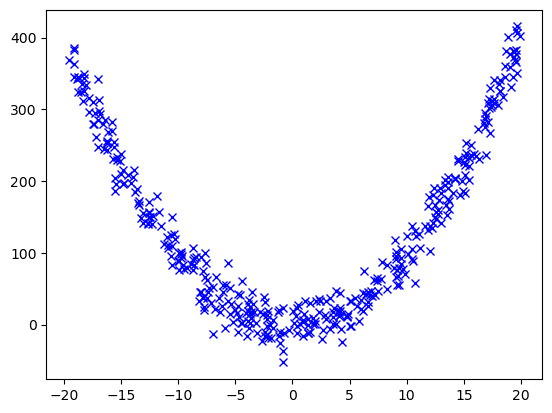

In [4]:
import matplotlib.pyplot as plt

plt.plot(X, y, 'x', color='blue')

## Linear Regression (OLS)

Train a OLS model and print the resulting line

In [5]:
# Code to concatenate intercept anad coef in a single array

# W = np.concatenate((poly_model.intercept_.flatten(), poly_model.coef_.flatten()))

## Polynomial Regression

Train a quadratic model and print the resulting line

## Polynomial Regression with degree=k

Use PolynomialFeatures to create a polynomial model with a high degree

In [6]:
## Split Test and training


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=.2, random_state = 45)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(320, 1)
(80, 1)
(320, 1)
(80, 1)


In [8]:
from sklearn.linear_model import LinearRegression

ols_model = LinearRegression().fit(X_train, y_train)

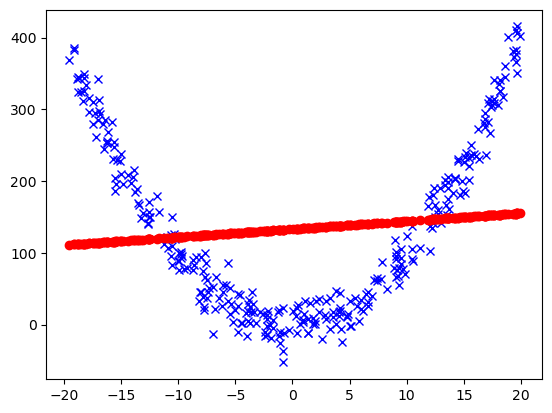

In [9]:
plt.plot (X_train, y_train, 'x', color='blue')
plt.plot (X_train, ols_model.predict (X_train), 'o', color='red')


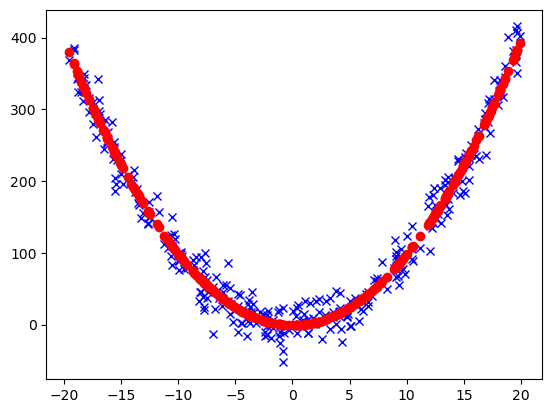

In [10]:
X_train2 = X_train * X_train
ols_model2 = LinearRegression().fit(X_train2, y_train)
plt.plot (X_train, y_train, 'x', color='blue')
plt.plot (X_train, ols_model2.predict (X_train2), 'o', color='red')


In [11]:
from sklearn.metrics import mean_squared_error
print (mean_squared_error (y_train, ols_model.predict(X_train2)))

23077.331729618592


In [12]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline 

In [13]:
# X_transformed = PolynomialFeatures (degree=2, include_bias = False).fit_transform(X_train)
# X_transformed
reg_pipeline = Pipeline ([('poly_features', PolynomialFeatures (degree=40, include_bias = False)),
                          ('scaler', StandardScaler()),
                         ('regressor', LinearRegression())])

In [14]:
reg_pipeline.fit (X_train, y_train)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=40, include_bias=False)),
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [15]:
reg_pipeline.named_steps['regressor'].coef_

array([[ 1.64640987e+02, -7.72685119e+02, -1.82464213e+04,
         1.03967458e+05,  9.08656860e+05, -4.92315430e+06,
        -2.47348753e+07,  1.24942915e+08,  4.13190406e+08,
        -1.97013915e+09, -4.59323572e+09,  2.10000949e+10,
         3.59602925e+10, -1.59467679e+11, -2.06298204e+11,
         8.93361500e+11,  8.91687924e+11, -3.78229185e+12,
        -2.96006504e+12,  1.23041640e+13,  7.64128353e+12,
        -3.10861797e+13, -1.54431263e+13,  6.13398954e+13,
         2.44683200e+13, -9.45996866e+13, -3.02630759e+13,
         1.13504129e+14,  2.88990207e+13, -1.04787548e+14,
        -2.08837781e+13,  7.29703803e+13,  1.10399323e+13,
        -3.70622730e+13, -4.02627267e+12,  1.29537090e+13,
         9.05097035e+11, -2.78494723e+12, -9.44817221e+10,
         2.77605053e+11]])

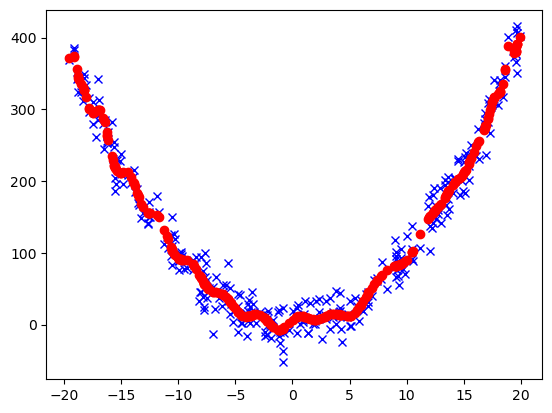

In [16]:
plt.plot (X_train, y_train, 'x', color='blue')
plt.plot (X_train, reg_pipeline.predict (X_train), 'o', color='red')

In [17]:
print (mean_squared_error (y_test, reg_pipeline.predict (X_test)))
print (mean_squared_error (y_train, reg_pipeline.predict (X_train)))

print (mean_squared_error (y_test, ols_model.predict(X_test * X_test)))
print (mean_squared_error (y_train, ols_model.predict(X_train2)))

473.6769624141205
336.6612477866788
23667.10134045436
23077.331729618592
